In [1]:
import sys
sys.path.append('/home/wytse/Desktop/led_system_modelling')
import NoiseModule as nm
import SimpaHelper as sh
from src.utils.cyberdyne_led_array_system import CyberdyneLEDArraySystem
from simpa import Tags
import numpy as np
from simpa.io_handling import load_hdf5
import matplotlib.pyplot as plt
import h5py
import simpa as sp

/home/wytse/Desktop/packages/venv/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


PATH test_structure/61_gt/optical_attenuation_size_frequencyresponse_on_baseline.hdf5


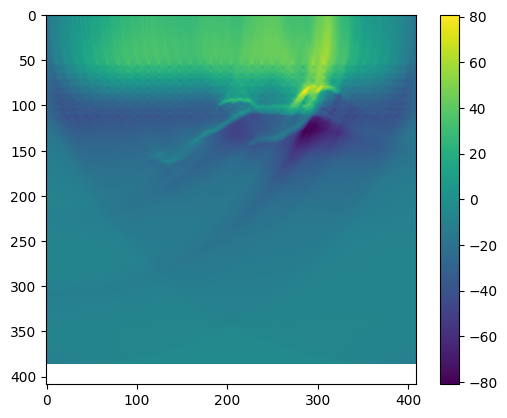

In [2]:
# path1 = '../results/optical_frequencyresponse.hdf5'
path2 = 'test_structure/61_gt/optical_attenuation_size_frequencyresponse_on_baseline.hdf5'
simpa_helper = sh.SimpaHelper(hdf5_file_path=path2)
sino = simpa_helper.extract_sinogram()
simpa_helper.reconstruct()
simpa_helper.visualize_reconstruction()

In [3]:
sinogram = simpa_helper.extract_sinogram()

In [4]:
noise_file = np.load('spec_sinogram.npz')
noise_sinogram = nm.reflection_artifact(sinogram, noise_file['sinogram'])

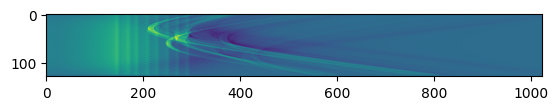

In [5]:
plt.imshow(sinogram)

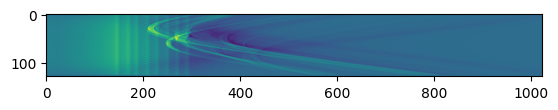

In [6]:
plt.imshow(noise_sinogram)

In [7]:
simpa_helper.save_sinogram(noise_sinogram, 'reflection_test.hdf5')

In [8]:
simpa_noise = sh.SimpaHelper('reflection_test.hdf5')

PATH reflection_test.hdf5


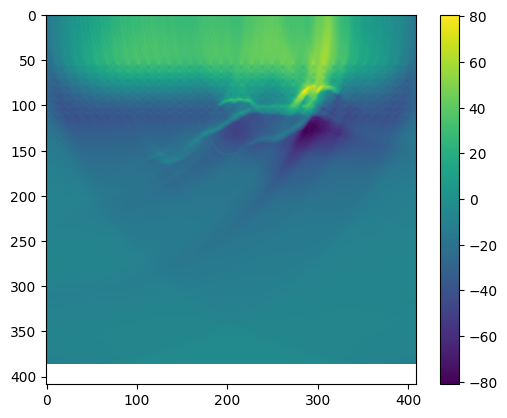

In [10]:
simpa_noise.reconstruct()
simpa_noise.visualize_reconstruction()

In [11]:
# check if overall intensity does not rise

In [12]:
sino.mean()

6.429855491591897

In [13]:
noise_sinogram.mean()

6.430499356780428